In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

In [ ]:
!ls "/content/drive/My Drive"

 archive.zip
 Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf
 Books
'Colab Notebooks'
 cv
'deep learning notes.pdf'
'gate 2022'
'Gate 2023'
'Gate 2024'
 GDToT
'Getting started.pdf'
 Hand-on-ML.pdf
'iit madras'
'Iit madras mtech admission fee.pdf'
 IMG-20210329-WA0000.jpg
 IMG_20221001_173115.jpg
'Information Brochure.pdf'
 latex
'Machine Learning-Foundations of Machine Learning 2nd Ed.pdf'
 new
'new cv.pdf'
 newtwin.c
 NLP.pdf
'numerics of linear algebra'
 placement
 progrphoto
 pythonprogram
'RRB_ALP_Science_Booster_2024_(PYP_Based)_Free_Ebook_(English)_65bcbe3ec9a40b57cb1ada21_(English).pdf'
 understanding-machine-learning-theory-algorithms.pdf
 YuuDrive


In [ ]:
# Correct path to your zip file
zip_path = '/content/drive/My Drive/archive.zip'

# Where to extract the contents
extract_path = '/content/images'
os.makedirs(extract_path, exist_ok=True)

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

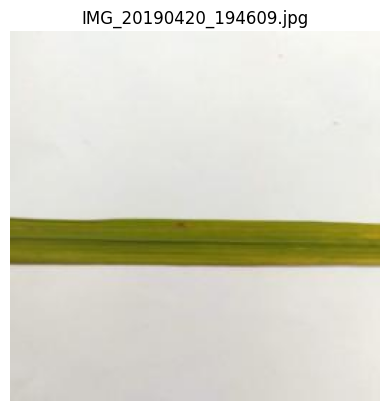

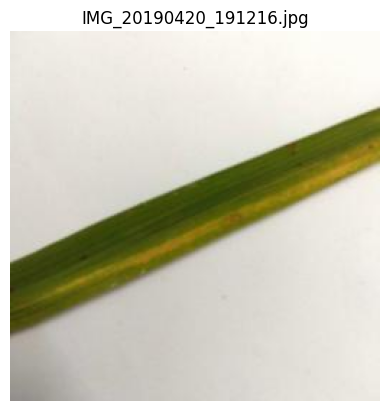

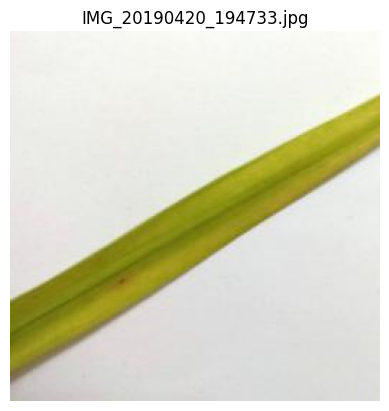

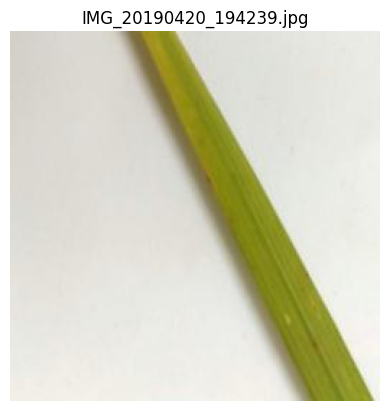

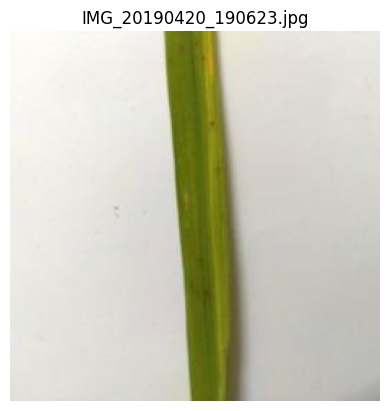

In [ ]:
# Look for JPG files inside extracted folder
image_files = glob.glob(extract_path + '/**/*.jpg', recursive=True)[:5]

# Show first 5 images
for img_path in image_files:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout, BatchNormalization

In [ ]:
model = Sequential()

# Add Batch Normalization at the start
model.add(BatchNormalization(input_shape=(256,256,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5)) # Add Dropout before MaxPooling
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.5)) # Add Dropout before MaxPooling
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


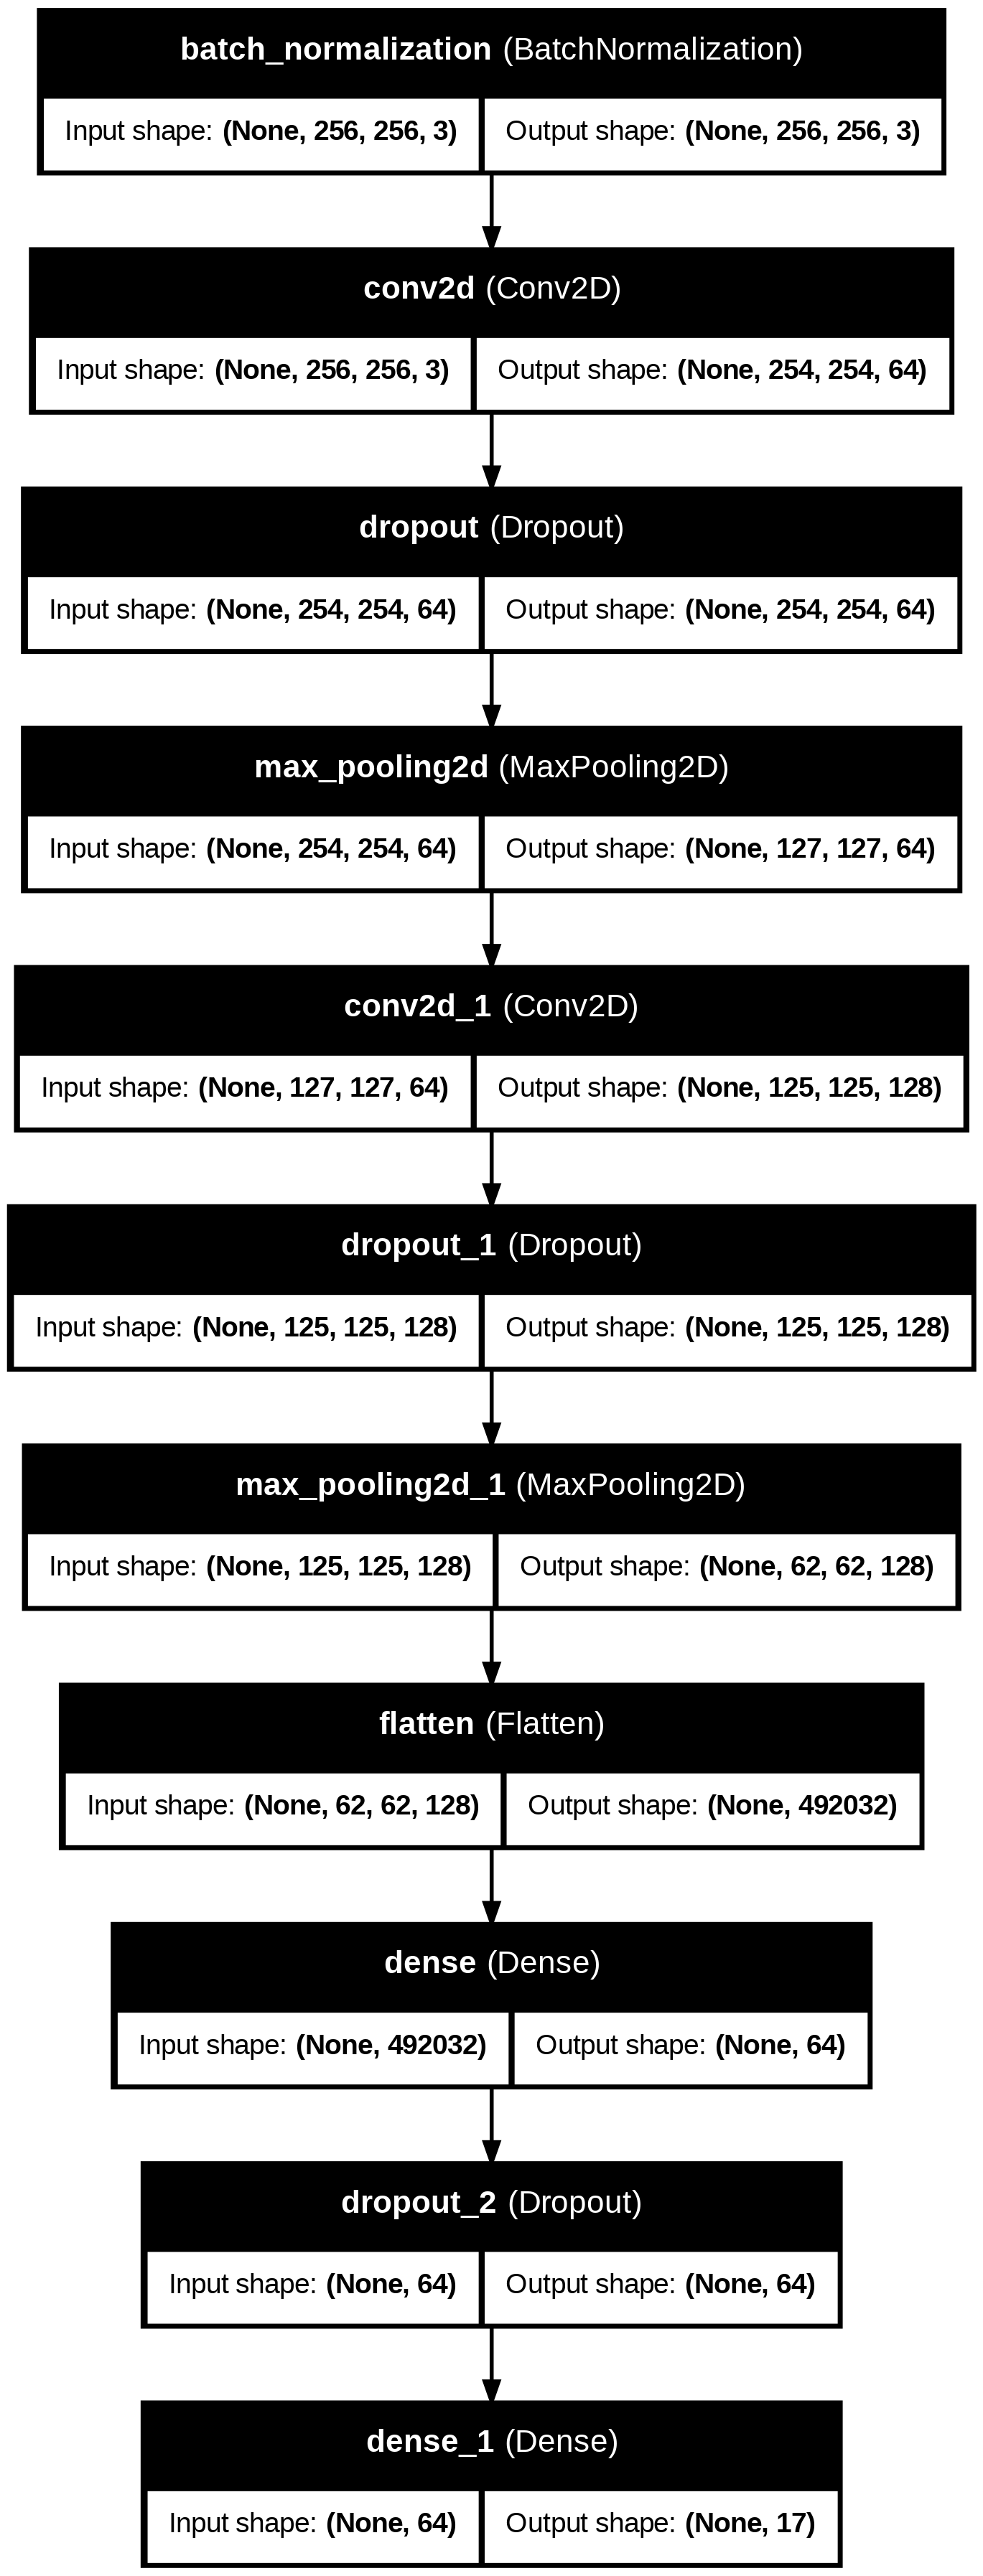

In [ ]:
plot_model(model,show_layer_names=True,show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
dataset_path = '/content/images'

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))


/content/images/Crop Diseases/Potato___Late_Blight/3e81c41f-5b6b-4458-8aa8-6a544a8e678c___RS_LB 4963.JPG
/content/images/Crop Diseases/Potato___Late_Blight/939a9a98-cbc9-4b83-bb47-395f26d7fddd___RS_LB 4293.JPG
/content/images/Crop Diseases/Potato___Late_Blight/d20fef22-7016-4115-9930-a66b32c718c6___RS_LB 4417.JPG
/content/images/Crop Diseases/Potato___Late_Blight/5bbebfcc-4e51-47ba-948c-46be12f1c170___RS_LB 2716.JPG
/content/images/Crop Diseases/Potato___Late_Blight/0f6eac3b-d674-4c4d-ab3a-88689feec07f___RS_LB 5232.JPG
/content/images/Crop Diseases/Potato___Late_Blight/465669d7-b75c-4aab-8ccc-af3566baf2e3___RS_LB 4985.JPG
/content/images/Crop Diseases/Potato___Late_Blight/9c230647-02da-4948-9c52-dfc87bb1d34a___RS_LB 4593.JPG
/content/images/Crop Diseases/Potato___Late_Blight/2b064606-e6e2-46e0-9788-d1049f0e4fed___RS_LB 4246.JPG
/content/images/Crop Diseases/Potato___Late_Blight/8f80caee-38ed-4b49-9596-6f66c3cb9c1b___RS_LB 2535.JPG
/content/images/Crop Diseases/Potato___Late_Blight/0051

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
zip_path = '/content/drive/My Drive/archive.zip'
extract_path = '/content'

# Extract only if not already done
if not os.path.exists('/content/Crop Diseases'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

In [ ]:
dataset_path = '/content/Crop Diseases'

# Sanity check: show folders
import os
print("Detected class folders:")
print(os.listdir(dataset_path))

Detected class folders:
['Potato___Late_Blight', 'Rice___Brown_Spot', 'Rice___Neck_Blast', 'Rice___Healthy', 'Potato___Early_Blight', 'Sugarcane_Red Rot', 'Corn___Northern_Leaf_Blight', 'Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Sugarcane_Bacterial Blight', 'Wheat___Brown_Rust', 'Potato___Healthy', 'Wheat___Healthy', 'Wheat___Yellow_Rust', 'Corn___Healthy', 'Rice___Leaf_Blast', 'Sugarcane_Healthy']


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_set = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_set = datagen.flow_from_directory(
    dataset_path, # same directory as training data
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 10664 images belonging to 17 classes.
Found 2660 images belonging to 17 classes.


In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_set, epochs=10, batch_size=16, validation_data=validation_set, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 203s 567ms/step - accuracy: 0.2852 - loss: 5.1939 - val_accuracy: 0.5669 - val_loss: 1.7085
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 165s 493ms/step - accuracy: 0.5139 - loss: 1.3843 - val_accuracy: 0.5865 - val_loss: 1.2523
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 202s 495ms/step - accuracy: 0.5315 - loss: 1.2293 - val_accuracy: 0.5850 - val_loss: 1.2651
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 158s 473ms/step - accuracy: 0.5754 - loss: 1.1333 - val_accuracy: 0.6586 - val_loss: 1.1347
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 159s 477ms/step - accuracy: 0.6149 - loss: 1.0977 - val_accuracy: 0.6639 - val_loss: 0.9209
Epoch 6/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 157s 468ms/step - accuracy: 0.6550 - loss: 0.9400 - val_accuracy: 0.6560 - val_loss: 0.9372
Epoch 7/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 174s 520ms/step - accuracy: 0.6625 - loss: 0.8780 - val_accuracy: 0.6944 - val_loss: 0.9058
Epoch 8/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 158s 472ms/step - accuracy: 0.7101 -

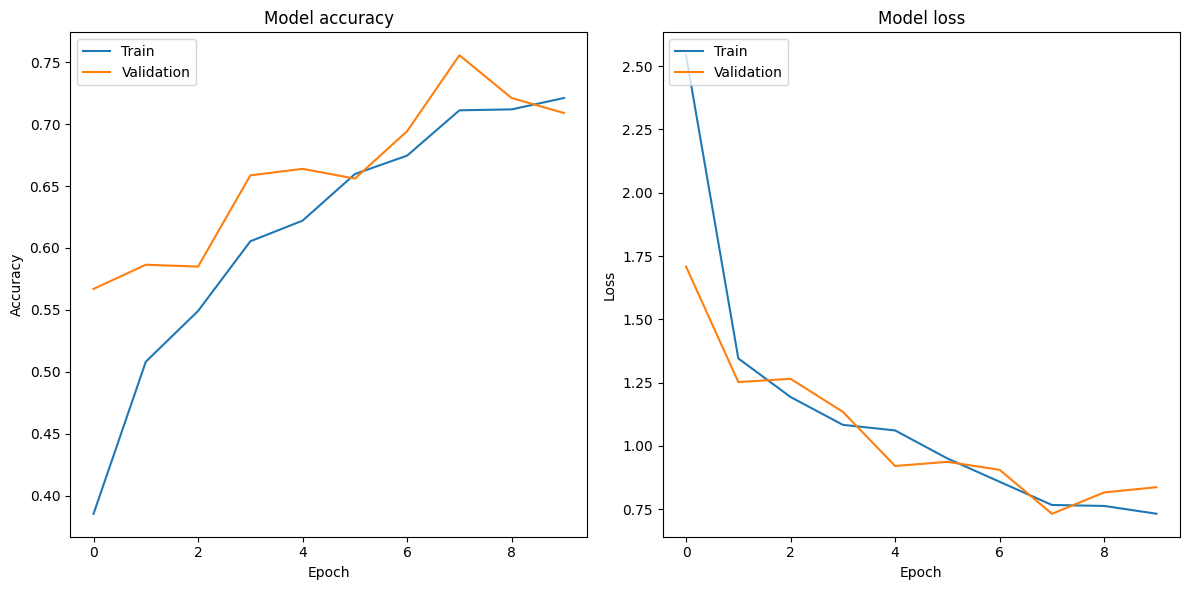

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [ ]:
classes =train_set.class_indices
icd={i:j for j,i in classes.items()}
def output(location):
    img=load_img(location,target_size=(256,256,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    predict_x=model.predict(img)
    classes_x=np.argmax(predict_x,axis=1)
    print ('Pridicted Class',icd[classes_x[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Pridicted Class Potato___Early_Blight


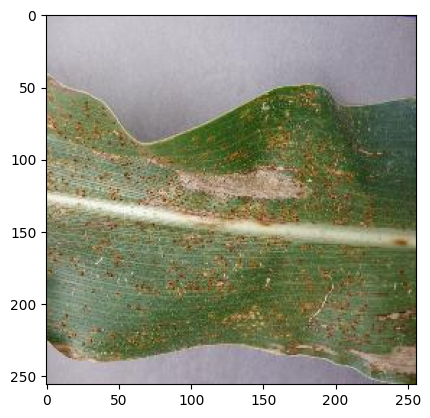

In [ ]:
test_img=os.path.join(extract_path, 'Crop Diseases/Corn___Northern_Leaf_Blight/image (209).JPG')
pic=load_img(test_img,target_size=(256,256,3))
plt.imshow(pic)
output(test_img)